# Analytic Report for Capstone

Author:Nutan Mandale, email:nutan.mandale@gmail.com

Mentor:Nemanja Radojkovic

**Thinkful prep-course capstone analytic report and research proposal.**                             

Date:February 5 2017

This notebook is for the capstone of prep course of Thinkful Datascience bootcamp. This topic of *Global Warming* is very important for every one who is on the planet earth.This issue needs to be analysed and timely measures should be taken before it is too late.
In this note book we will see what global warming is , what kind of data we are using to see if there is actual global warming happening or not.
We will analyze the data of land temperature in different regions and different seasons.

# Global Warming 

Global warming is defined as the increase in temperature of land, ocean and atmosphere of the earth. There is a **global warming controversy** which creates fear in some people while others rule it out. There are many reasons for them to stand for their point.The meteorological department have records of temperature which can help us to analyse the scenario.


## Data Description

The data is taken from the website www.kaggle.com. The raw data comes from the [Berkeley Earth data page] (http://berkeleyearth.org/data/). The data set consist of several files .
They are:
   * Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
   * Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
   * Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
   * Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
   * Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)
For thtis analysis I am using 3 files.
   * Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
   * Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)
   * Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
    
The GlobalTemperature.csv file consist of
   * Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
   * LandAverageTemperature: global average land temperature in celsius
   * LandAverageTemperatureUncertainty: the 95% confidence interval around the average
   * LandMaxTemperature: global average maximum land temperature in celsius
   * LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
   * LandMinTemperature: global average minimum land temperature in celsius
   * LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
   * LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
   * LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature
        Similarly the file GlobalLandTemperaturesByCity,csv consist of 
   *  Date :Starts from November 1st 1743 for the cities from different countries.
   *  AverageTemperature:Average land temperature in celsius
   *  AverageTemperatureUncertainty:the 95% confidence interval around the average
   * City:Temperature of the city
   * Country:Country the city belongs to
   * Latitude:The distance of city to north or south from equator
   *  Longitude:the angular distance of the city east or west of the meridian at Greenwich
        The third file is GlobalLandTemperaturesByCountry.csv
   * Date 
   * AverageTemperature
   * AverageTemperatureUncertainity
   * Country

## Analytic Questions

1 Is global warming really happening?


2 What part of the world has experienced it most?


3 How are seasons of the year affected by global warmng?

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *

In [2]:
#import csv
countries = pd.read_csv("./GlobalLandTemperaturesByCountry.csv")
df = pd.DataFrame(countries)

In [4]:
countries.dt = pd.to_datetime(countries.dt, format='%Y-%m-%d')
countries['Year'] = countries.dt.apply(lambda x: x.year)

Let us look at the annual temperature in different continents.Let us take a country from all the populated continents

In [5]:
burundi = countries[countries.Country == 'Burundi']
united_states = countries[countries.Country == 'United States']
brazil = countries[countries.Country == 'Brazil']
antarctica = countries[countries.Country == 'Antarctica']
china = countries[countries.Country == 'China']
france = countries[countries.Country == 'France']
australia = countries[countries.Country == 'Australia']
burundi = burundi.groupby('Year',as_index = False).mean()
united_states = united_states.groupby('Year',as_index = False).mean()
brazil = brazil.groupby('Year',as_index = False).mean()
antarctica = antarctica.groupby('Year',as_index = False).mean()
china = china.groupby('Year',as_index = False).mean()
france = france.groupby('Year',as_index = False).mean()
australia = australia.groupby('Year',as_index = False).mean()

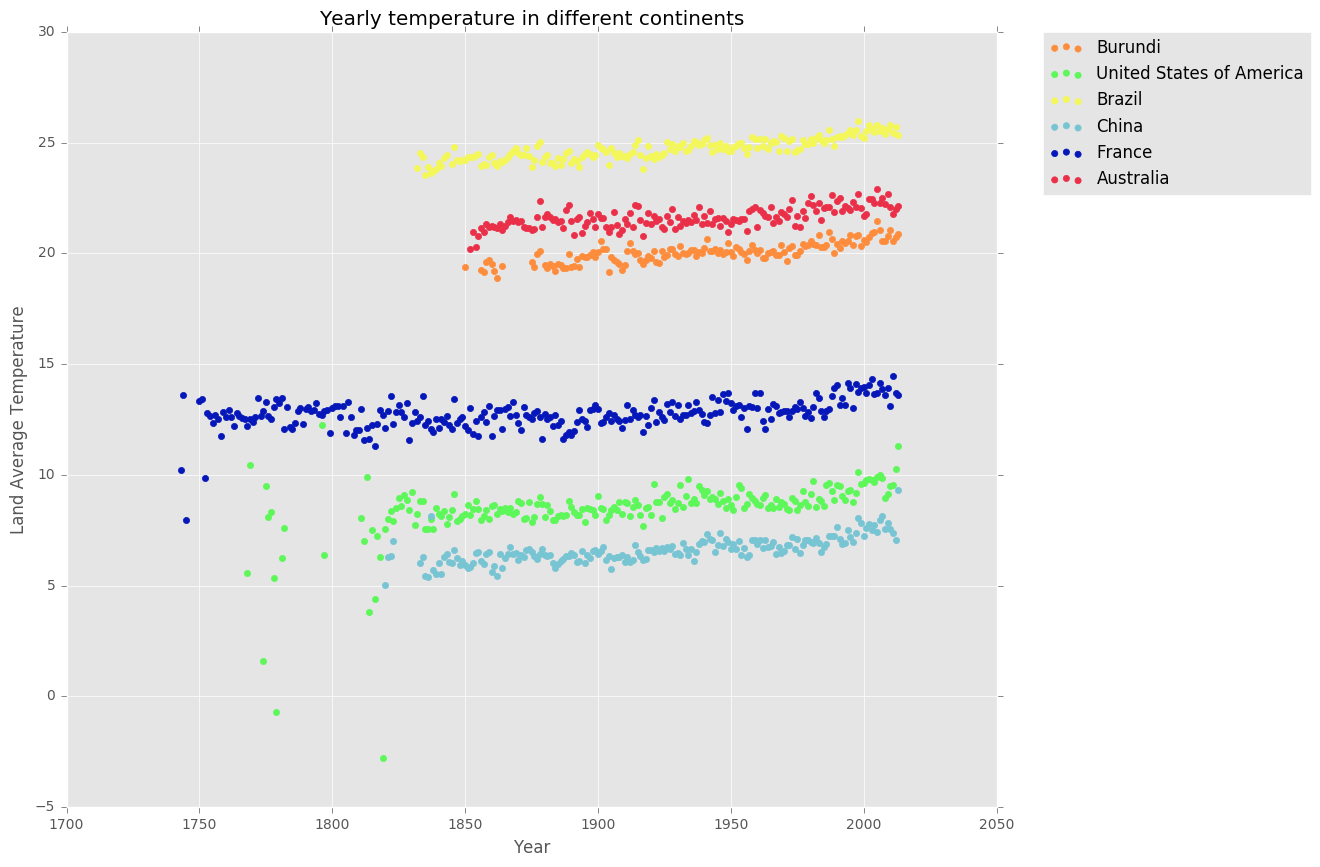

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(burundi.Year,burundi.AverageTemperature, color = '#FD8D3D',label = 'Burundi')
plt.scatter(united_states.Year,united_states.AverageTemperature, color = '#5DF75A' ,label = 'United States of America')
plt.scatter(brazil.Year,brazil.AverageTemperature, color = '#F4F75A',label = 'Brazil')
plt.scatter(china.Year,china.AverageTemperature, color = '#77C4D3',label = 'China')
plt.scatter(france.Year,france.AverageTemperature, color = '#0617B9',label = 'France')
plt.scatter(australia.Year,australia.AverageTemperature, color = '#EA2F49',label = 'Australia')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Yearly temperature in different continents')
plt.style.use('ggplot');

With this plot we can say that there is uniform ries in temperature in all the continents. Also we understood that the European country France have started recording temperature since 1750 while the other countries started inearly to mid 19th century.

Now let us analyse the temperature of land in different temperature zones of the earth.

In [13]:
#read csv file
city_df= pd.read_csv("./GlobalLandTemperaturesByCity.csv")
df=pd.DataFrame(city_df)

In [14]:
city_df.dt = pd.to_datetime(city_df.dt, format='%Y-%m-%d')
city_df['Year'] = city_df.dt.apply(lambda x: x.year)
city_df.Latitude = city_df.Latitude.apply(lambda x: float(x[:-1]))

In [15]:

city_df.loc[(city_df.Latitude < 30.0 ) ,'region'] = 'Tropical'
city_df.loc[(city_df.Latitude > 60.0 ) ,'region'] = 'Polar'
city_df.loc[(city_df.Latitude >= 30.0 )  & (city_df.Latitude <= 60.0 ) ,'region'] = 'Temperate'
city_df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'Year', 'region'],
      dtype='object')

In [16]:
city_df.groupby(['City','region'], as_index = False).mean()['region'].value_counts()

Tropical     1836
Temperate    1611
Polar          25
Name: region, dtype: int64

In [17]:
temperate = city_df[city_df.region == 'Temperate']
tropical = city_df[city_df.region == 'Tropical']
polar = city_df[city_df.region == 'Polar']
temperate = temperate.groupby('Year',as_index = False).mean()
tropical = tropical.groupby('Year',as_index = False).mean()
polar = polar.groupby('Year',as_index = False).mean()

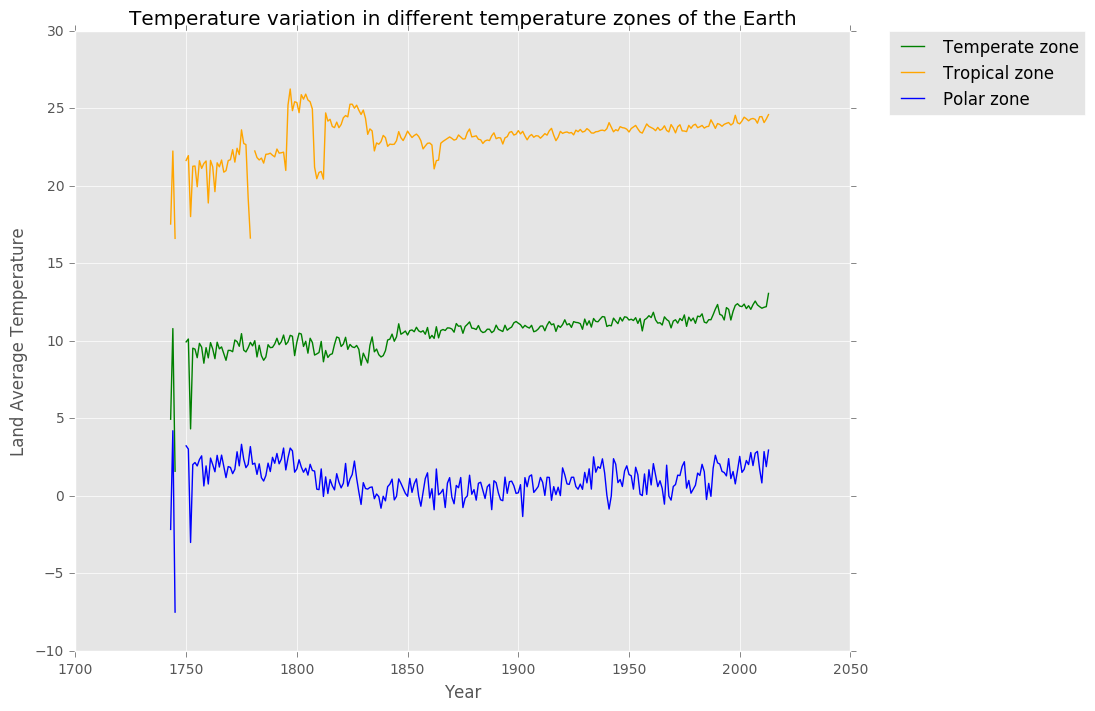

In [18]:
plt.figure(figsize=(10,8))
plt.plot(temperate.Year,temperate.AverageTemperature, color = 'green',label = 'Temperate zone')
plt.plot(tropical.Year,tropical.AverageTemperature, color = 'orange',label = 'Tropical zone')
plt.plot(polar.Year,polar.AverageTemperature, color = 'blue',label = 'Polar zone')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Temperature variation in different temperature zones of the Earth')
plt.style.use('ggplot');

With this plot we see increase in temperature in all the three temperature zones of the earth

Let us see what is the mean temperature in the different temperature zones of the earth.

Polar mean temperature =  1.0701323786679757
Temperate mean temperature =  10.53666899842802
Tropical mean temperature =  23.162360011567053


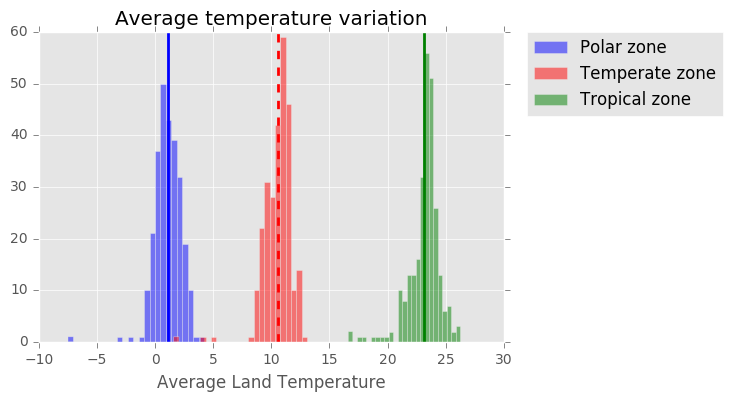

In [25]:
polar_mean = polar.AverageTemperature.mean()
temperate_mean = temperate.AverageTemperature.mean()
tropical_mean = tropical.AverageTemperature.mean()
plt.hist(polar.AverageTemperature.dropna(),bins=25,color='b',alpha=0.5, label = "Polar zone")
plt.axvline(polar_mean, color ='b',linestyle='solid',linewidth = 2)
plt.hist(temperate.AverageTemperature.dropna(),bins=25,color='r',alpha=0.5, label = "Temperate zone")
plt.axvline(temperate_mean, color ='r',linestyle='dashed',linewidth = 2)
plt.hist(tropical.AverageTemperature.dropna(),bins=25,color='g',alpha=0.5, label = "Tropical zone")
plt.axvline(tropical_mean, color ='g',linestyle='solid',linewidth = 2)
plt.title('Average temperature variation')
plt.xlabel('Average Land Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print("Polar mean temperature = " ,polar_mean)
print("Temperate mean temperature = " ,temperate_mean)
print("Tropical mean temperature = " ,tropical_mean);

With this plot we can understand average land temperature mean in different temperature zones of the earth.

Now Let us see monthly temperature change year by year. For that let us take year 1900,1950,2000 and 2010 and analyse their temperature  month by month

In [26]:
#read csv file
environment = pd.read_csv("./GlobalTemperatures.csv")
df=pd.DataFrame(environment)
print('Nrows before dropping NAs: ' + str(environment.shape[0]))
environment.dropna(subset=['LandAverageTemperature'], inplace=True)
print('Nrows after dropping NAs: ' + str(environment.shape[0]))
environment.dt = pd.to_datetime(environment.dt, format='%Y-%m-%d')

Nrows before dropping NAs: 3192
Nrows after dropping NAs: 3180


In [27]:
environment['Year'] = environment.dt.apply(lambda x: x.year)
environment['Month'] = environment.dt.apply(lambda x: x.month)

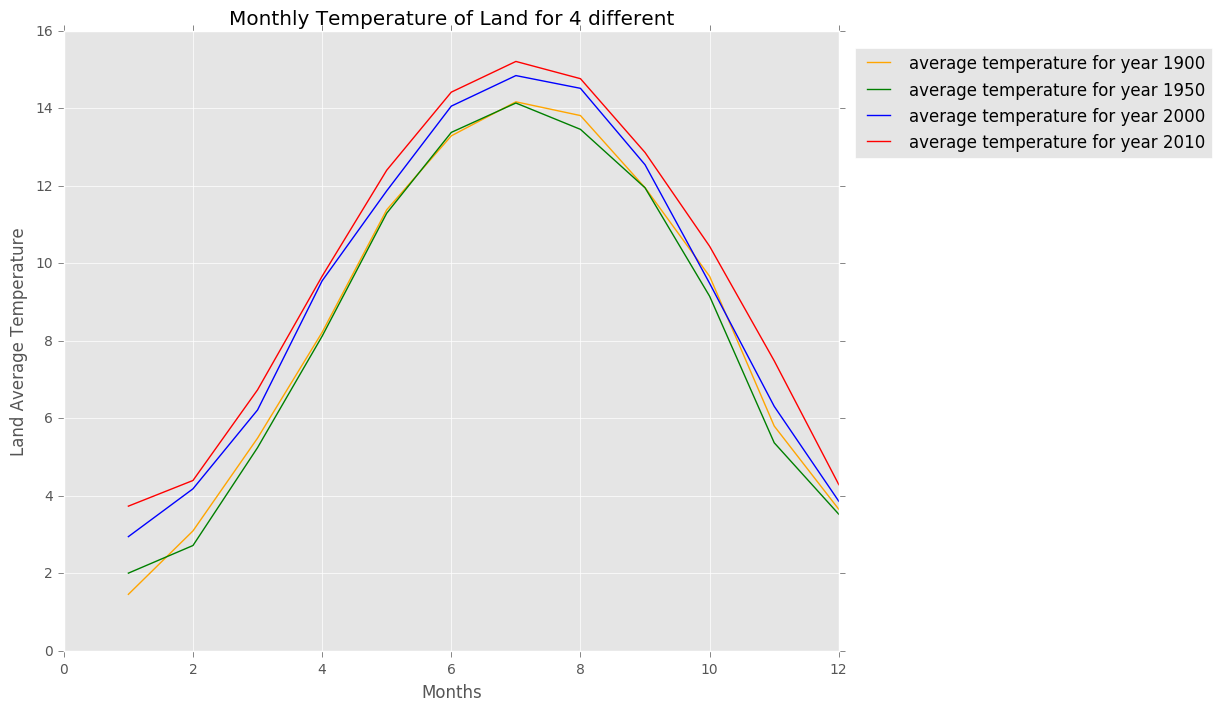

In [28]:
year_1900 = environment[environment.Year == 1900]
year_1950 = environment[environment.Year == 1950]
year_2000 = environment[environment.Year == 2000]
year_2010 = environment[environment.Year == 2010]
plt.figure(figsize=(10,8))
plt.plot(year_1900.Month, year_1900.LandAverageTemperature, color = "orange" , label = "average temperature for year 1900" )
plt.plot(year_1950.Month, year_1950.LandAverageTemperature, color = "green", label = "average temperature for year 1950")
plt.plot(year_2000.Month, year_2000.LandAverageTemperature, color = "blue", label = "average temperature for year 2000")
plt.plot(year_2010.Month, year_2010.LandAverageTemperature, color = "red",label = "average temperature for year 2010")
plt.rc('grid', linestyle="-", color='grey')
plt.grid(True)
plt.xlabel('Months')
plt.ylabel('Land Average Temperature')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.title('Monthly Temperature of Land for 4 different')
plt.style.use('ggplot');

Temperature rise is very prominent. Let us zoom in winter months and summer months of the plot above and see what we find.

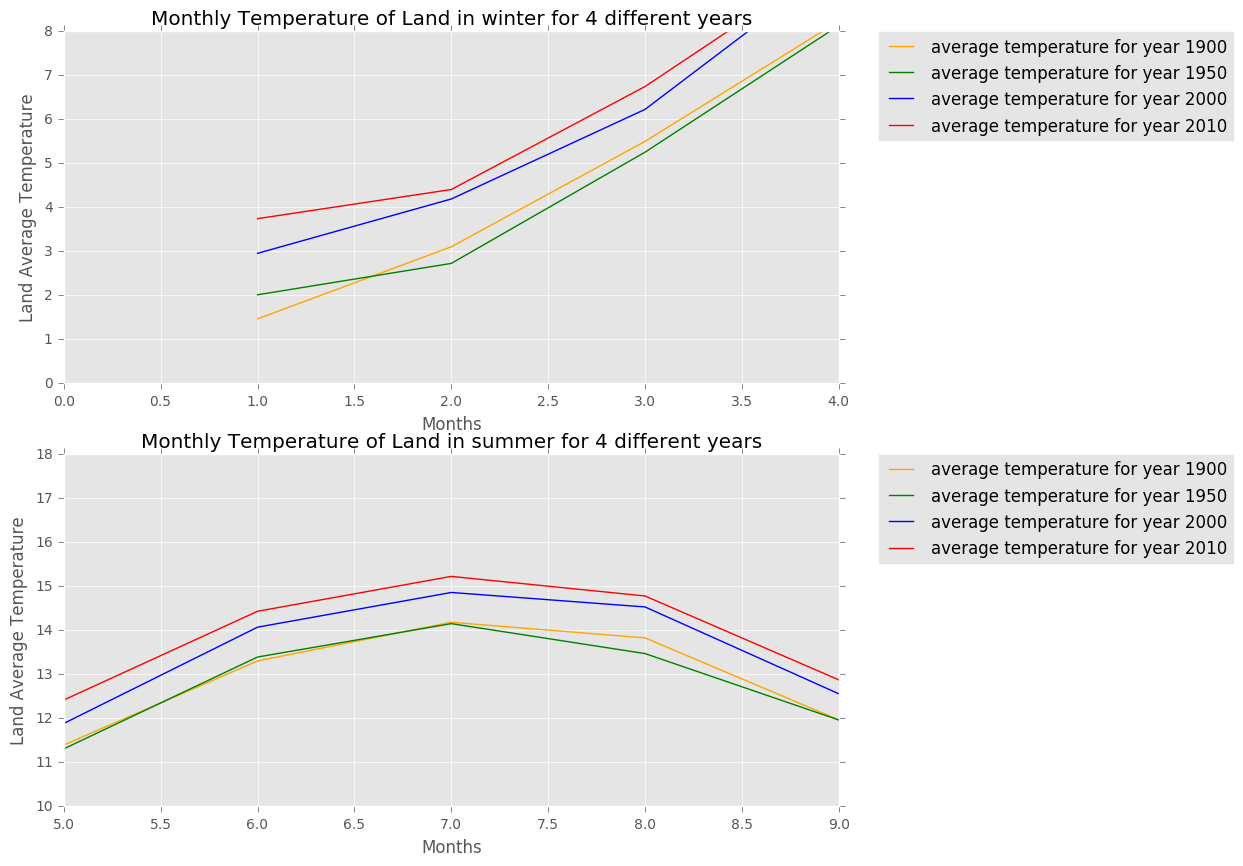

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(year_1900.Month, year_1900.LandAverageTemperature, color = "orange" , label = "average temperature for year 1900" )
plt.plot(year_1950.Month, year_1950.LandAverageTemperature, color = "green", label = "average temperature for year 1950")
plt.plot(year_2000.Month, year_2000.LandAverageTemperature, color = "blue", label = "average temperature for year 2000")
plt.plot(year_2010.Month, year_2010.LandAverageTemperature, color = "red",label = "average temperature for year 2010")
plt.xlabel('Months')
plt.ylabel('Land Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Monthly Temperature of Land in winter for 4 different years')
plt.xlim((0,4))
plt.ylim((0,8))
plt.subplot(2,1,2)
plt.plot(year_1900.Month, year_1900.LandAverageTemperature, color = "orange" , label = "average temperature for year 1900" )
plt.plot(year_1950.Month, year_1950.LandAverageTemperature, color = "green", label = "average temperature for year 1950")
plt.plot(year_2000.Month, year_2000.LandAverageTemperature, color = "blue", label = "average temperature for year 2000")
plt.plot(year_2010.Month, year_2010.LandAverageTemperature, color = "red",label = "average temperature for year 2010")
plt.xlabel('Months')
plt.ylabel('Land Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Monthly Temperature of Land in summer for 4 different years')
plt.xlim((5,9))
plt.ylim((10,18));

We see winters are not as cold in 2010 as it used to be in 1900. Even though we see rise in summer temperatures as well.

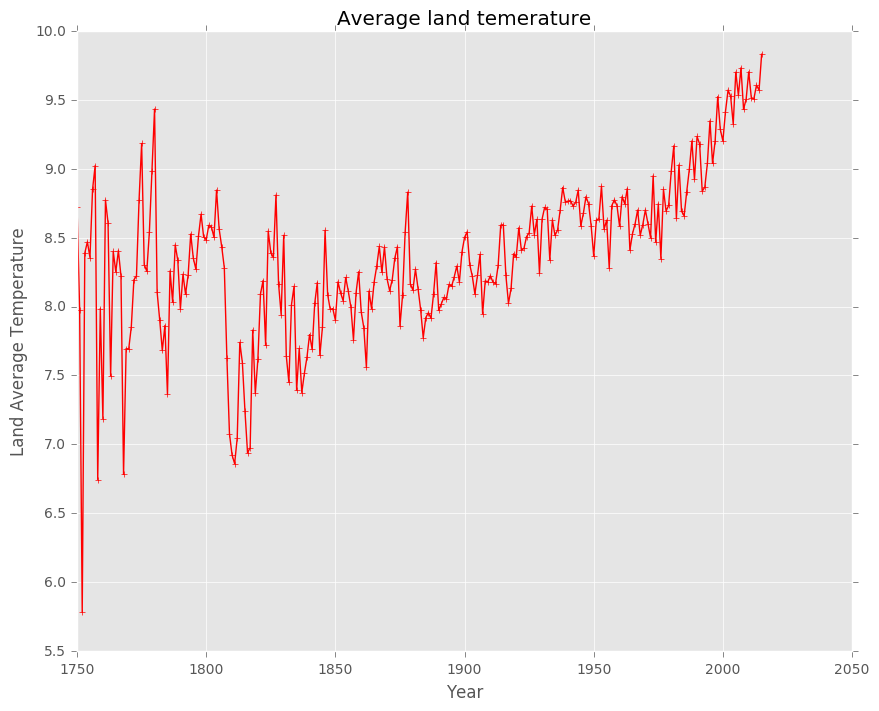

In [30]:
environment = environment.groupby('Year',as_index = False).mean()
plt.figure(figsize=(10,8))
plt.plot(environment.Year,environment.LandAverageTemperature,'r+-',markersize=5)
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.title('Average land temerature');

## Further Research

With this plot it is clear that average temperature of land is surely increasing. We see more rise in temperature since 1950. There are many factors that contribute for the rise in land temperature.

The dataset provide tell us that earth is warming up but the resons that cause this needs to be analysed in detail.
Greenhouse gases, human footprints ,earth's seismic activities are some of the reasons for the increase in the temperature of land.
With the data on the above mentioned topics we can clearly say the causes of global warming and can prevent further damage to this precious planet

## Referances

*  https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
*  https://en.wikipedia.org/wiki/Global_warming